# Qualitative analysis of growth/decline words
In which we qualitatively compare growth and decline words in terms of linguistic dissemination.

Cherry-picked example pairs:
- sorta (decline) vs. kinda (growth)
- fuckwit (decline) vs. fuckboy (growth)
- lolno (decline) vs. lmao (growth)
- OK (decline) vs. ???
- yup (decline) vs. yas (growth)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [31]:
tf = pd.read_csv('../../data/frequency/2013_2016_tf_norm_log.tsv',
                 sep='\t', index_col=0)
D_L = pd.read_csv('../../data/frequency/2013_2016_3gram_residuals.tsv', 
                 sep='\t', index_col=0)
shared_vocab = tf.index & D_L.index
shared_vocab = list(filter(lambda x: type(x) is str, shared_vocab))
tf = tf.loc[shared_vocab, :]
D_L = D_L.loc[shared_vocab, :]
# tf = np.exp(tf)

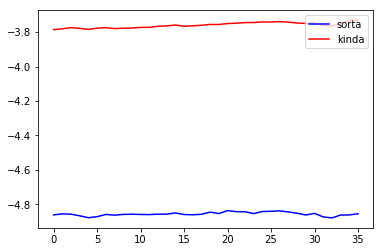

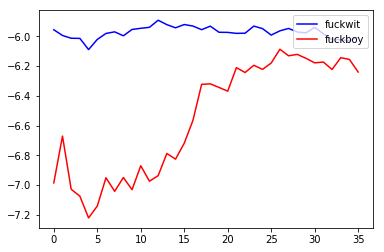

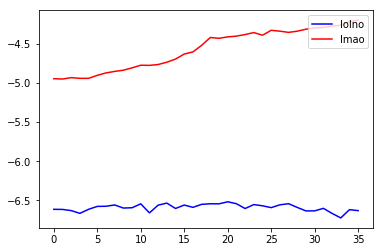

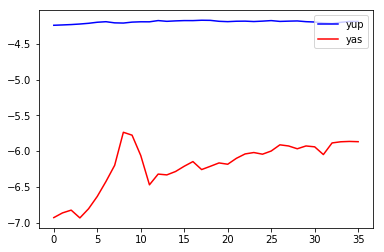

In [9]:
word_pairs = [
    ('sorta', 'kinda'),
    ('fuckwit', 'fuckboy'),
    ('lolno', 'lmao'),
    ('yup', 'yas')
]
M = tf.shape[1]
X = np.arange(M)
decline_color = 'b'
growth_color = 'r'
for w1, w2 in word_pairs:
    w1_tf = tf.loc[w1, :]
    w2_tf = tf.loc[w2, :]
    plt.plot(X, w1_tf, label=w1, color=decline_color)
    plt.plot(X, w2_tf, label=w2, color=growth_color)
    plt.legend(loc='upper right')
    plt.show()

These plots make it hard to see what's going on. Let's rely on just the stats.

## Compare ratio of dissemination/frequency
Do the growth words have an unusually high degree of dissemination in their early stages, compared to the decline words?

In [49]:
# normalize to [0,1]
from sklearn.preprocessing import minmax_scale
norm_stat = lambda x: x.apply(minmax_scale, axis=1)
tf_norm = norm_stat(tf)
D_L_norm = norm_stat(D_L)
DL_tf_ratio = D_L_norm / tf_norm
# replace inf, nan with 1
DL_tf_ratio.replace(np.inf, 1, inplace=True)
DL_tf_ratio.replace(np.nan, 1, inplace=True)
display(DL_tf_ratio.head(20))

,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05
word,,,,,,,,,,,,,,,,,,,,,
just,0.0,0.036247,0.040802,0.058648,0.123152,0.143027,0.183549,0.195071,0.182967,0.204225,...,0.560750,0.520034,0.762978,1.269024,1.118789,6.371649,1.000000,1.073492,0.532214,0.485805
like,0.0,0.071521,0.073645,0.085949,0.195640,0.255006,0.356719,0.289640,0.262133,0.282207,...,0.511119,0.513472,1.023137,1.671839,1.177632,4.573552,1.000000,0.988625,0.552131,0.526262
can,0.0,1.860800,0.279184,1.000000,0.352681,0.096212,0.108119,0.127251,0.155800,0.181145,...,0.514852,0.586985,1.298680,3.240295,1.923281,5.675568,22.449489,0.979591,0.578362,0.533974
one,0.0,0.119683,0.111336,0.140906,0.196596,0.155530,0.236577,0.261097,0.352896,0.377769,...,1.523987,1.455981,4.057091,5.926993,3.051262,109.914925,1.000000,9.989406,3.081556,3.105379
get,1.0,0.166614,0.052110,0.113903,0.096781,0.176654,0.263650,0.327588,0.340872,0.492518,...,0.743626,0.520803,0.764153,2.226095,1.510312,11.320165,3.756231,1.253050,0.589002,0.842766
people,0.0,0.043080,0.041544,0.111014,0.171555,0.287085,0.442475,0.406305,0.265751,0.337212,...,0.798206,1.117791,2.906877,1.770075,2.427325,12.141698,1.000000,0.844918,0.714820,0.835211
will,0.0,1.000000,0.314862,0.192217,0.380759,0.506274,0.543738,0.352489,0.357711,0.302177,...,0.569887,0.608647,1.063165,2.140544,5.742097,2.902326,1.950709,0.609805,0.462401,0.436949
think,0.0,0.072310,0.082857,0.066014,0.169052,0.202917,0.279377,0.216862,0.182024,0.187257,...,0.871124,0.766395,1.322657,2.789555,2.376785,11.621285,1.000000,1.246097,0.658179,0.632967
really,0.0,0.051963,0.042618,0.058321,0.114121,0.111058,0.161866,0.149051,0.150396,0.186434,...,0.620469,0.684554,1.043067,1.766216,1.604946,8.063391,1.000000,1.884578,0.809696,0.932680


Let's compare the mean ratio in the first $k=3$ months for the word pairs.

In [56]:
k = 3
DL_tf_ratio_early = DL_tf_ratio.iloc[:, 1:k+1].mean(axis=1)
# D_L_early = D_L.iloc[:, :k].mean(axis=1)
for w1, w2 in word_pairs:
    print('w1=%s DL/f = %.3E'%(w1, DL_tf_ratio_early.loc[w1]))
    print('w2=%s DL/f = %.3E'%(w2, DL_tf_ratio_early.loc[w2]))

w1=sorta DL/f = 5.457E-02
w2=kinda DL/f = 2.704E-01
w1=fuckwit DL/f = 2.015E-01
w2=fuckboy DL/f = 2.513E+00
w1=lolno DL/f = 5.835E-01
w2=lmao DL/f = 8.382E-01
w1=yup DL/f = 4.790E-01
w2=yas DL/f = 9.198E+00
